In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
exp1 = pd.read_csv('exp1.csv')

In [73]:
exp1.head()

,p1_load,p2_load,ac_opf_success,ac_pf_success
0,9,10,1,1
1,9,20,1,1
2,9,30,1,1
3,9,40,1,1
4,9,50,1,1


In [74]:
exp1.shape

(5000, 4)

In [75]:
exp1['converge'] = 0

for i in range(0, exp1.shape[0]):
    
    if (exp1.loc[i,'ac_opf_success'] == 1) and (exp1.loc[i,'ac_pf_success'] == 1):
        exp1.loc[i,'converge'] = 'AC OPF + DC OPF'
    elif (exp1.loc[i,'ac_opf_success'] == 1) and (exp1.loc[i,'ac_pf_success'] == 0):
        exp1.loc[i,'converge'] = 'AC OPF only'
    elif (exp1.loc[i,'ac_opf_success'] == 0) and (exp1.loc[i,'ac_pf_success'] == 1):
        exp1.loc[i,'converge'] = 'DC OPF only'
    else:
        exp1.loc[i,'converge'] = 'None'
        
exp1 = exp1[exp1['converge'] != 'None']

exp1['converge'].value_counts()

AC OPF + DC OPF    2116
AC OPF only         572
Name: converge, dtype: int64

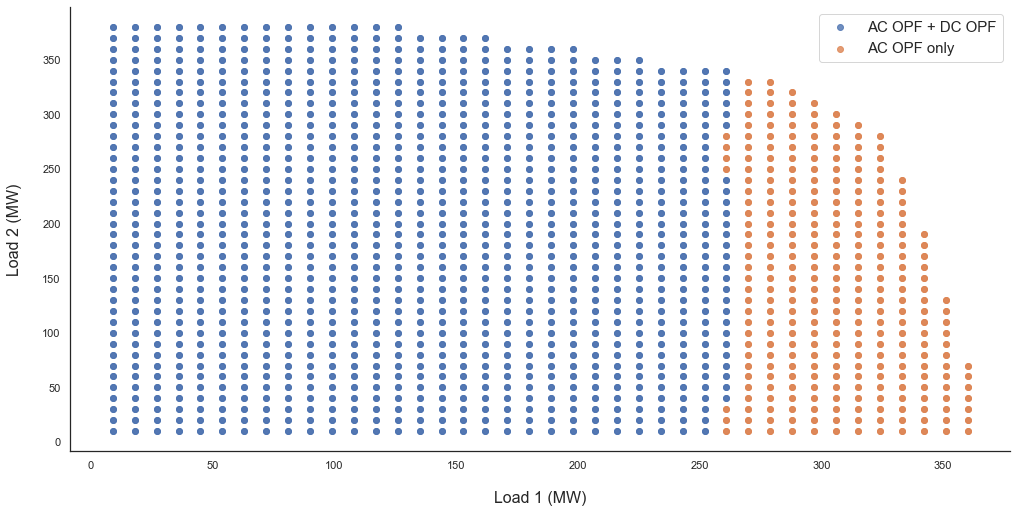

In [77]:
sns.set_style(style='white') 

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="p1_load", y="p2_load", data=exp1, fit_reg=False, hue='converge', legend=False, height=7, aspect=2)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right', fontsize = 15)

plt.xlabel('Load 1 (MW)', fontsize = 16, labelpad = 20)
plt.ylabel('Load 2 (MW)', fontsize = 16, labelpad = 20)

plt.savefig('exp1_simulation.png')
plt.show()